# Introduction to Econometrics - Homework 2

June 18, 2021

Zhenning LI, Miao WANG, Jiaqian MA, Yixin ZHAO

## 1. CAPM versus Fama-French model

### 1.1 Estimate the CAPM model

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


url = "https://raw.githubusercontent.com/adufays/GDP_expectancy/main/IBM_returns.csv"
df = pd.read_csv(url, sep=",")
df = df.drop('Unnamed: 0', axis = 1)
df

,Date,IBM - RF,Mkt - RF,SMB,HML,RMW,CMA
0,2000/01,-3.64,-4.74,4.15,-0.29,-6.05,4.73
1,2000/02,-8.89,2.45,18.32,-9.93,-18.33,-0.51
2,2000/03,14.74,5.20,-14.91,7.38,11.68,-1.05
3,2000/04,-6.27,-6.40,-5.55,8.61,7.55,5.27
4,2000/05,-4.26,-4.42,-3.68,2.56,4.63,0.74
...,...,...,...,...,...,...,...
205,2017/02,3.00,3.57,-2.12,-1.79,0.78,-1.72
206,2017/03,-3.19,0.17,0.78,-3.17,0.68,-1.00
207,2017/04,-8.00,1.09,0.49,-1.87,2.00,-1.55
208,2017/05,-4.84,1.06,-3.05,-3.78,1.21,-1.88


In [8]:
# CAPM parameters 
y = df["IBM - RF"]
x = df["Mkt - RF"]

x_capm = sm.add_constant(x)
y_capm = y
model_capm = sm.OLS(y_capm, x_capm).fit()
print(model_capm.summary())

                            OLS Regression Results                            
Dep. Variable:               IBM - RF   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     123.1
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           9.13e-23
Time:                        12:34:15   Log-Likelihood:                -663.24
No. Observations:                 210   AIC:                             1330.
Df Residuals:                     208   BIC:                             1337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1379      0.396     -0.348      0.7

So the model now is: $P[K_t=1|x_t]=\Phi(-0.1379 + 0.9983*x_{t, 2})$

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

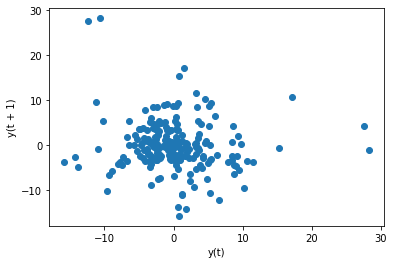

In [9]:
# scatter plot of residuals  
resid = y - model_capm.fittedvalues
pd.plotting.lag_plot(resid, lag=1)

The lag plot shows that there exists no linear relation between error terms. The white noise assumption thus holds.

$H_0: \beta_1=0$ VS $H_1: \beta_1 \neq 0$ at significance level of 5%

The absolute value of t-statistic is 0.348, below the critical value 1.96. The p-value of beta1 is 0.728, way higher than 5%. We do not reject the null hypothesis. $\beta_1$ is **not** statiscally significant.

---

$H_0: \beta_2=0$ VS $H_1: \beta_2 \neq 0$ at significance level of 5%.

The absolute value of t-statistic is 0.0.090, below the critical value 1.96. The p-value of beta1 is 0.000, lower than 5%. We reject the null hypothesis. $\beta_2$ is statiscally significant.


### 1.2 Estimate the FF model

In [10]:
Y = df["IBM - RF"]
T = np.size(Y)
X = np.zeros([T,6])
X[:,0] = 1 #intercept
X[:,1:6] = df.iloc[:,2:7]

X = sm.add_constant(X) 
model_ff = sm.OLS(Y, X).fit()
print(model_ff.summary())

                            OLS Regression Results                            
Dep. Variable:               IBM - RF   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     30.17
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           6.68e-23
Time:                        12:34:15   Log-Likelihood:                -653.92
No. Observations:                 210   AIC:                             1320.
Df Residuals:                     204   BIC:                             1340.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2760      0.408      0.676      0.5

In [11]:
content = round(model_ff.pvalues,3)
content = pd.DataFrame(content)
content = content.reset_index()
content.columns = ['param', 'p-value']
content

,param,p-value
0,const,0.500
1,x1,0.000
2,x2,0.007
3,x3,0.218
4,x4,0.334
5,x5,0.271


Among 5 parameters, only $\beta_2$ and $\beta_3$ have p-values smaller than 5%. So $\beta_2$ and $\beta_3$ are statistically different from zero.

### 1.3 Fisher test

$H_0:\beta_{3}^{(\mathrm{FF})}=\beta_{4}^{(\mathrm{FF})}=\beta_{5}^{(\mathrm{FF})}=\beta_{6}^{(\mathrm{FF})}=0\quad VS\quad H_1: at\ least\ one\ \beta_{i}^{(\mathrm{FF})}\neq0, i\in[3,6]$ at significance level of 5%

In [12]:
# restricted model
Y_tilde = Y 
X_2 = X[:,0:2]
model_ff2 = sm.OS(Y_tilde, X_2).fit()
resid_R = Y - model_ff2.fittedvalues
SSR_R = np.sum(resid_R**2)

AttributeError: module 'statsmodels.api' has no attribute 'OS'

In [ ]:
# unrestriced model 
beta_U = [model_ff.params[i] for i in range(6)]
resid_U = Y - X@beta_U
SSR_U = np.sum(resid_U**2)

In [ ]:
K = np.size(X,1)
T = np.size(Y)
R_sq = 1-SSR_U/SSR_R
df1 = 4 #number of constraints 
df2 = T-K
F_test = (df2/df1)*(SSR_R-SSR_U)/SSR_U
F_p_val = (1-stats.f.cdf(F_test,df1,df2))
print("F statistic:", F_test)
print("p-value:", F_p_val)

Here T = 210 >100, the F-statistic is proportional to a chi-square realization. F-statistics is 4.74 > 1. We reject the null hypothesis. 

The p-value of 1.13% also shows that under the null hypothesis, it is unlikely to observe such a sample. Therefore we reject the null hypothesis.  

We conclude that CAPM does NOT fit comparably to the FF model and FF includes more statistically significant variables. 

## 2. Limited dependent variables

### 2.1 Estimate the probit model

The probit model is: $P[K_t=1|x_t]=\Phi(\beta_{1} + \beta_{2}x_{t, 2} + \beta_{3}x_{t, 3} + \beta_{4}x_{t, 4})$, now we can use the Probit function to calculate.

In [13]:
from statsmodels.discrete.discrete_model import Probit

url_2 = "https://raw.githubusercontent.com/adufays/GDP_expectancy/main/AER_App_data.csv"
data = pd.read_csv(url_2, sep = ",")

game = np.array(data['cat5'])
data_gameonly=data[game==1]
killer=data_gameonly["killerappgros"]
X_killer = data_gameonly[["scoreapp","avprice","avsize"]]
X_killer = sm.add_constant(X_killer)

# fit the model using maximum likelihood
probit_model = Probit(killer, X_killer).fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.207425
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:          killerappgros   No. Observations:                 7683
Model:                         Probit   Df Residuals:                     7679
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Jun 2021   Pseudo R-squ.:                  0.1791
Time:                        12:34:16   Log-Likelihood:                -1593.6
converged:                       True   LL-Null:                       -1941.4
Covariance Type:            nonrobust   LLR p-value:                1.916e-150
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6547      0.072    -36.849      0.000      -2.796      -2.513
scoreapp       0.2636      0.

### 2.2 Significance of parameters

In [14]:
print(probit_model.pvalues)

const       3.071704e-297
scoreapp     1.347346e-58
avprice      1.913249e-28
avsize       4.530415e-25
dtype: float64


From the result we can see, all parameters are significant, because their p-values are almost equal to zero.

### 2.3 Interpret signs of coefficient 

In [15]:
a = list(probit_model.params)
print('Coefficient for Constant is {}, \nCoefficient for scoreapp is {}, \
    \nCoefficient for avprice is {}, \nCoefficient for avsize is \
    {}'.format(a[0],a[1],a[2],a[3]))

Coefficient for Constant is -2.654660819428224, 
Coefficient for scoreapp is 0.2636077537641145,     
Coefficient for avprice is 0.12935353364239707, 
Coefficient for avsize is     0.006336470446564775


From the result, we can see all of the coefficients are positive (except the one for constant), indicating that all factors exert a positive effect on the app popularity.

### 2.4 Probit model with ratings only

Here we use a second model, $P[K_t=1|x_t]=\Phi(\beta_{1} + \beta_{2}x_{t, 2})$.

In [16]:
score=data_gameonly["scoreapp"]
score = sm.add_constant(score)
probit_model_score = Probit(killer, score).fit() 
print(probit_model_score.summary())

Optimization terminated successfully.
         Current function value: 0.224877
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:          killerappgros   No. Observations:                 7683
Model:                         Probit   Df Residuals:                     7681
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Jun 2021   Pseudo R-squ.:                  0.1101
Time:                        12:34:16   Log-Likelihood:                -1727.7
converged:                       True   LL-Null:                       -1941.4
Covariance Type:            nonrobust   LLR p-value:                 5.965e-95
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3512      0.064    -37.003      0.000      -2.476      -2.227
scoreapp       0.2632      0.

### 2.5 Likelihood ratio test

$H_0:\beta_{3}=\beta_{4}=0\quad VS\quad H_1: at\ least\ one\ \beta_{i}\neq0, i\in[3,4]$ at significance level of 95% 



*   **Under the null**

    The nested model (restricted model): $P\left[K_{t}=1 \mid x_{t}\right]=\Phi\left(\beta_{1}+\beta_{2} x_{t, 2}\right)$

*   **Under the alternative** 

    The full model (unrestricted model): $P\left[K_{t}=1 \mid x_{t}\right]=\Phi\left(\beta_{1}+\beta_{2} x_{t, 2}+\beta_{3} x_{t, 3}+\beta_{4} x_{t, 4}\right)$

*   **Likelihood ratio test**

$2\left[\ln f\left(c_{1}, \ldots, c_{T} \mid \hat{\beta}, x_{1: T}\right)-\ln f\left(c_{1}, \ldots, c_{T} \mid \tilde{\beta}_{1},\tilde{\beta}_{2}\right)\right] \sim \chi^{2}(m)$ under $H_{0}$

In [17]:
def lrtest(likelihood_R, likelihood_U, df):
  """
    Compute the likelihood ratio test and the p-value.
  """
  lr = 2 * (likelihood_U - likelihood_R)
  pvalue = 1-stats.chi2.cdf(lr, df)
  return lr, pvalue

In [18]:
ll_U = probit_model.llf #Log-likelihood of model
ll_R = probit_model_score.llf
m = 2 # number of restrictions 
print(ll_U, ll_R)

-1593.6458689504368 -1727.7288714316326


In [19]:
lr, p = lrtest(ll_R, ll_U, m)
print('Likelihood ratio test retult is {}, p value is: {}'.format(lr, p))

Likelihood ratio test retult is 268.1660049623915, p value is: 0.0


In [20]:
# To determine the threshold
threshold = stats.chi2.ppf(0.95,2)
print('The threshold is: {}'.format(threshold))

The threshold is: 5.991464547107979


Here the p-value is almost 0 and the likelihood test result (268.17) is far larger than the critical value(5.99). 

Therefore, we reject the null hypothesis with very strong level of confidence. Full model better predicts whether an app will become a 'killer app'. 

Apart from average rating, price and size are also significant factors.